In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

/home/ubuntu/.conda/envs/cse158a2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('epinion.csv')
data.head()


,item,user,paid,time,stars,words
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...


In [6]:
data['words'] = data['words'].fillna("").astype(str)

In [7]:
# Load a pre-trained Hugging Face sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=6)

# Define the classification function
def classify_sentiment(text):
    if not text.strip():  # Handle empty strings
        return "neutral"  # Or any default label
    result = sentiment_model(text[:512])  # Truncate to 512 tokens
    return result[0]['label']  # Extract the sentiment label

# Apply the function to classify all reviews
data['sentiment'] = data['words'].apply(classify_sentiment)

# Display the results
print(data[['words', 'sentiment']].head())

/home/ubuntu/.conda/envs/cse158a2/lib/python3.8/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


                                               words sentiment
0  i got this printer from minolta as a warranty ...   3 stars
1  although i love my vaio especially the gorgeou...   3 stars
2  this is my first laptop and i bought it about ...   5 stars
3  just recently my sony dej001 walkman died on m...   2 stars
4  well when i graduated from college it didnt ta...   3 stars


In [8]:
data.to_csv('output.csv', index=False)

In [9]:
data.head()

,item,user,paid,time,stars,words,sentiment
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...,3 stars
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...,3 stars
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...,5 stars
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...,2 stars
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...,3 stars


<Axes: >

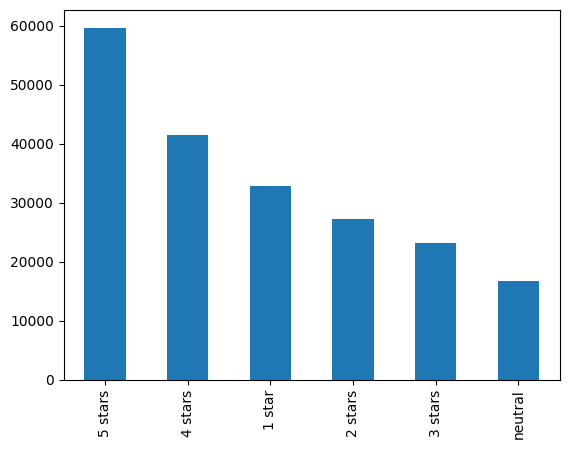

In [10]:
data['sentiment'].value_counts().plot(kind='bar')

In [13]:
data['sentiment'] = data['sentiment'].apply(lambda x: int(x[0]) if x != 'neutral' else 2.5)

In [15]:
data.to_csv('output.csv', index=False)

In [16]:
data_check = pd.read_csv('output.csv')

In [17]:
data_check.head()

,item,user,paid,time,stars,words,sentiment
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...,3.0
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...,3.0
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...,5.0
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...,2.0
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...,3.0
